Selected file: /Users/priyanka/Downloads/ligo.dat


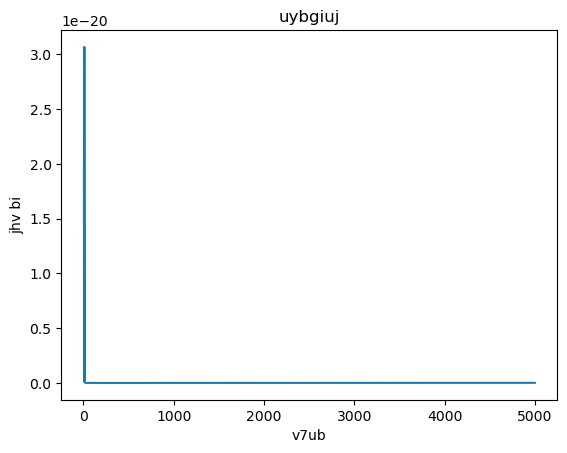

In [1]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


class DataPlotterApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Data Plotter")

        # Frame for buttons
        self.button_frame = tk.Frame(self.master)
        self.button_frame.pack(pady=10)

        # Button to select data file
        self.select_button = tk.Button(self.button_frame, text="Select Data File", command=self.select_data_file)
        self.select_button.pack(side=tk.LEFT, padx=10)

        # Button to plot data
        self.plot_button = tk.Button(self.button_frame, text="Plot Data", command=self.plot_data)
        self.plot_button.pack(side=tk.LEFT, padx=10)

        # Entry fields for x-label, y-label, and plot title
        self.label_frame = tk.Frame(self.master)
        self.label_frame.pack(pady=5)

        tk.Label(self.label_frame, text="X-label:").grid(row=0, column=0, padx=5)
        self.xlabel_entry = tk.Entry(self.label_frame)
        self.xlabel_entry.grid(row=0, column=1, padx=5)

        tk.Label(self.label_frame, text="Y-label:").grid(row=0, column=2, padx=5)
        self.ylabel_entry = tk.Entry(self.label_frame)
        self.ylabel_entry.grid(row=0, column=3, padx=5)

        tk.Label(self.label_frame, text="Plot Title:").grid(row=0, column=4, padx=5)
        self.title_entry = tk.Entry(self.label_frame)
        self.title_entry.grid(row=0, column=5, padx=5)

        # Frame for plot
        self.plot_frame = tk.Frame(self.master)
        self.plot_frame.pack(pady=10)

        # Initialize plot
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.plot_frame)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    def select_data_file(self):
        self.filename = filedialog.askopenfilename(title="Select Data File", filetypes=[("Data Files", "*.dat")])
        print("Selected file:", self.filename)

    def plot_data(self):
        try:
            data = np.loadtxt(self.filename)
            self.ax.clear()
            self.ax.plot(data[:, 0], data[:, 1])
            self.ax.set_xlabel(self.xlabel_entry.get())
            self.ax.set_ylabel(self.ylabel_entry.get())
            self.ax.set_title(self.title_entry.get())
            self.canvas.draw()
        except AttributeError:
            print("Please select a data file first.")
        except Exception as e:
            print("An error occurred:", e)


def main():
    root = tk.Tk()
    app = DataPlotterApp(root)
    root.mainloop()


if __name__ == "__main__":
    main()
